# Traitement des données en TP

Pour traiter les données issues d’expériences menées en TP, nous nous efforcerons d’utiliser le langage _python_. Nous utiliserons les bibliothèques `numpy` pour stocker et traiter les données, `matplotlib` pour faire des graphiques et `scipy` pour un traitement plus évolué dans certains cas. 

On pourra placer au début de la source du script utilisé pour traiter les données, les lignes suivantes 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

## Chargement des données

Il faut commencer par charger les données issues de l'expérience dans _python_. On peut procéder de plusieurs manières :

  - Directement dans le code source en définissant des listes de valeurs

In [2]:
u = np.array([1, 2, 5, 10, 15, 20]) 
i = np.array([0.12, 0.21, 0.53, 1.03, 1.48, 1.95])

  - Dans un fichier texte séparé, nommé par exemple `mesures.csv` qui contient les données suivantes :
  
  ```
  # Données mesurées
  # u i 
  1 0.12 
  2 0.21 
  5 0.53 
  10 1.03 
  15 1.48 
  20 1.95
  ```
  
  que l’on peut charger dans un tableau numpy par 
```python
valeurs = np.loadtxt("mesures.csv") 
```

Le fichier peut évidemment contenir plus de colonnes et plus de lignes. On pourra accéder à la liste des valeurs de `u` et de `i` par

```python
u = valeurs[:,0] 
i = valeurs[:,1]
```

## Traitement des données

### Opérations mathématiques sur les données

L’intérêt de la bibliothèque `numpy` est de faciliter grandement les opérations mathématiques sur les séries de données. Par exemple, on peut, à partir des valeurs de tension et d’intensité précédentes, calculer la puissance reçue en faisant 

In [3]:
P = u*i

# Affichage de la liste des puissances
print(P)

[ 0.12  0.42  2.65 10.3  22.2  39.  ]


On peut de même utiliser les opérateurs mathématiques usuels sur les tableaux `numpy` sans avoir à écrire explicitement des boucles parcourant les éléments de ces tableaux. Il faudra cependant souvent utiliser la version `numpy` des fonctions, par exemple `np.sin()`, `np.exp()`. 

### Régression linéaire

On est souvent amenés en TP à rechercher une relation linéaire (ou affine) entre deux grandeurs (par exemple ici, $u = Ri$). 

Pour cela on utilise une régression linéaire qui permet de trouver la droite qui décrit au mieux les données. Si on cherche $i(u)$ sous la forme $i = au + b$ on peut utiliser la fonction `np.polyfit()` pour déterminer les valeurs de $a$ et $b$ qui décrivent au mieux les données. On fera 

In [4]:
a,b = np.polyfit(u, i, 1) 
print("Équation de la droite : i=au+b") 
print("a = {}".format(a)) 
print("b = {}".format(b)) 

Équation de la droite : i=au+b
a = 0.09656013945380593
b = 0.03371876815804715


Avec les valeurs de $u$ et $i$ ci-dessus, on trouve $a = 0,097$ et $b = 0,034$. 

## Afficher un graphique

Pour afficher un graphique des données mesurées, on utilisera la bibliothèque `matplotlib`. 
Par exemple, avec les valeurs de $u$ et $i$ obtenues dans la partie précédente, on pourra écrire 

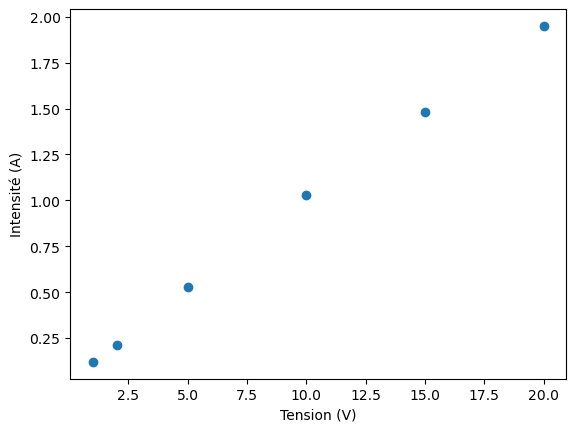

In [5]:
plt.plot(u, i, "o") 
ax = plt.gca() 
ax.set_xlabel("Tension (V)") 
ax.set_ylabel("Intensité (A)") 
plt.show() 

Pour tracer un graphique avec des barres d’erreur attachées aux points de mesures, on peut utiliser la fonction `plt.errorbar()` de la manière suivante 

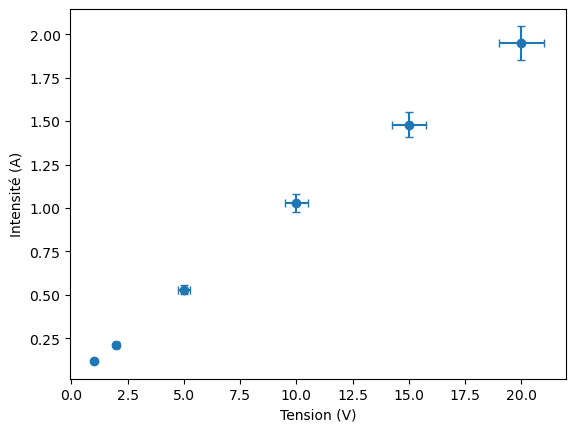

In [6]:
# Dans cet exemple, on considère qu'il y a une erreur relative de 5% sur les mesures de u et de i
plt.errorbar(u, i, xerr=0.05*u, yerr=0.05*i, fmt="o", capsize=3) 
ax = plt.gca() 
ax.set_xlabel("Tension (V)") 
ax.set_ylabel("Intensité (A)") 
plt.show() 

On peut ajouter la droite modélisée dans la partie précédente sur le graphique en faisant 

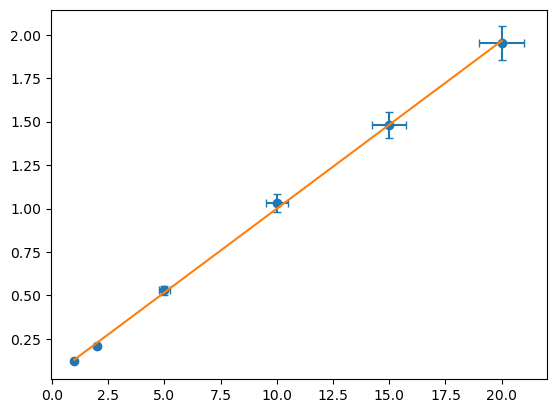

In [7]:
plt.errorbar(u, i, yerr=0.05*i, xerr=0.05*u, fmt="o", capsize=3, zorder=0) 
x = np.array([u[0], u[-1]]) # On choisit les deux valeurs extrêmes de tension 
y = a*x + b # On calcule les tensions correspondantes 
plt.plot(x,y, zorder=1) # On affiche la droite 
plt.show() 

## Estimation des incertitudes

Le résultat de la mesure d’une grandeur physique doit toujours être associé à une incertitude qui est une estimation de l'erreur commise lors de la mesure. Nous allons voir comment estimer une incertitude sur une grandeur qui est une fonction mathématique des grandeurs mesurées, ainsi que sur le résultat d’une régression linéaire. 

Dans les deux cas, nous utiliserons une méthode de _Monte Carlo_, qui consiste à simuler un grand nombre d’expériences en variant les grandeurs mesurées dans leur plage d’incertitude pour estimer la variabilité du résultat obtenu.

### Incertitude sur le résultat d'un calcul

Dans l’exemple précédent, supposons que l’on cherche à évaluer l'incertitude sur la puissance $P = ui$ consommée par le dipôle étudié. 
On simule un grand nombre de mesures fictives où $u$ et $i$ varient dans leur plage d’incertitude et on stocke la liste des puissances associées. Enfin, on détermine l'incertitude sur la puissance en calculant l’écart-type de la liste de valeurs obtenues. 

On pourra utiliser le script Python suivant 

In [8]:
Nexp=1000 # Nombre de simulations de points de mesure 
P = u*i 
du = 0.05*u # Incertitude type sur u 
di = 0.05*i # Incertitude type sur i 
dP = [] # Incertitudes type sur la puissance 
for k in range(len(u)): # Boucle sur chaque couple de valeurs mesurées
    lP = [] #On initialise une liste de puissances vide 
    for j in range(Nexp): 
        u_j = np.random.normal(u[k], du[k]) # valeur de u aléatoire
        i_j = np.random.normal(i[k], di[k]) # valeur de i aléatoire
        lP.append(u_j*i_j) 
    dP.append(np.std(np.array(lP))) # Calcule l'écart-type de la liste des puissances 

On obtient de cette manière la liste des incertitudes sur les valeurs de $P$ :

In [9]:
print(dP)

[0.008413411101207786, 0.029530945790683334, 0.18782788962371583, 0.7327782578030497, 1.5983734444024593, 2.793564186628564]


### Incertitutde sur le résultat d'une régression linéaire

On applique de la même manière une méthode de _Monte-Carlo_ pour déterminer l'incertitude-type sur les résultats d'une régression linéaire. On simule un grand nombre de fois la même expérience, on effectue la régression linéaire sur les points simulés et on détermine l'écart-type des listes de paramètres obtenus par la régression linéaire. Dans l’exemple de la mesure de $u$ et $i$ précédent, on pourrait utiliser le code suivant : 

In [10]:
Nexp = 1000 # Nombre de simulations de points de mesure 
la = [] # Liste des valeurs du paramètre a 
lb = [] # Liste des valeurs du paramètre b 
du = 0.05*u # Incertitudes-types sur u (on choisit arbitrairement une incertitude de 5%)
di = 0.05*i # Incertitudes-types sur i (on choisit arbitrairement une incertitude de 5%)
for k in range(Nexp): 
    temp_u = np.random.normal(u, du) # Simulation aléatoire de valeurs de u 
    temp_i = np.random.normal(i, di) # Simulation aléatoire de valeurs de i 
    a,b = np.polyfit(temp_u, temp_i, 1) # Régression linéaire 
    la.append(a) 
    lb.append(b) 
print("Équation de la droite : i=au+b") 
print("a = {} ± {}".format(np.average(la), np.std(la))) 
print("b = {} ± {}".format(np.average(lb), np.std(lb))) 

Équation de la droite : i=au+b
a = 0.09625389275068504 ± 0.005942562450780003
b = 0.03673069629535615 ± 0.02942274693820741
